In [1]:
# Test on a Toy Example.

In [2]:
import numpy as np # Linear Algebra library (Matix and ...)
import pandas as pd # Dataframe and csv file
import seaborn as sns # instead of matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('xAPI-Edu-Data.csv') #Data Frame is ready

In [4]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
t1=df.shape
print(df.shape)
print(t1[0])
print(t1[1])

(480, 17)
480
17


In [6]:
df.isnull().sum()  #To check how many null do we have in each 

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# Data Visualization

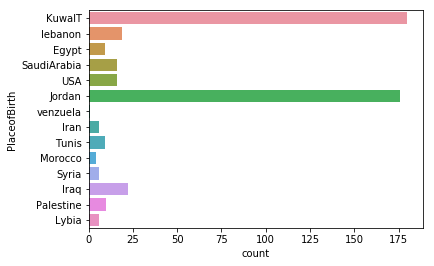

In [7]:
#Demonstrating the data based on Topic (IT, Arabic, ...)
sns.countplot(y="PlaceofBirth", data=df) #always based on count

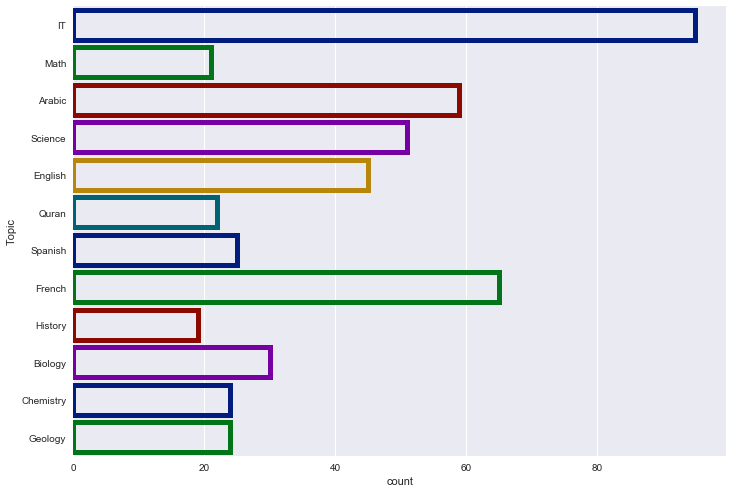

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #Bigger Size
sns.countplot(y="Topic", data=df,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette("dark",10), palette="muted") #always based on count
plt.show()

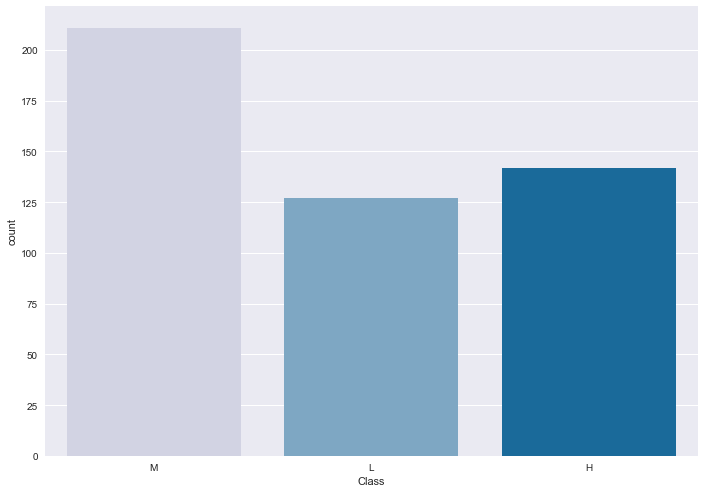

In [9]:
sns.set()
sns.countplot(x="Class", data=df, palette="PuBu") #Always based on count
plt.show()

In [10]:
df.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

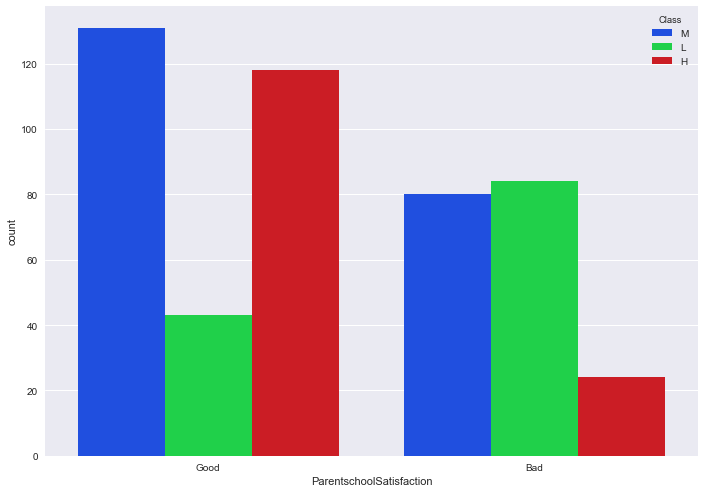

In [11]:
sns.countplot(x="ParentschoolSatisfaction", data=df, hue='Class' , palette="bright") #Always based on count
plt.show()

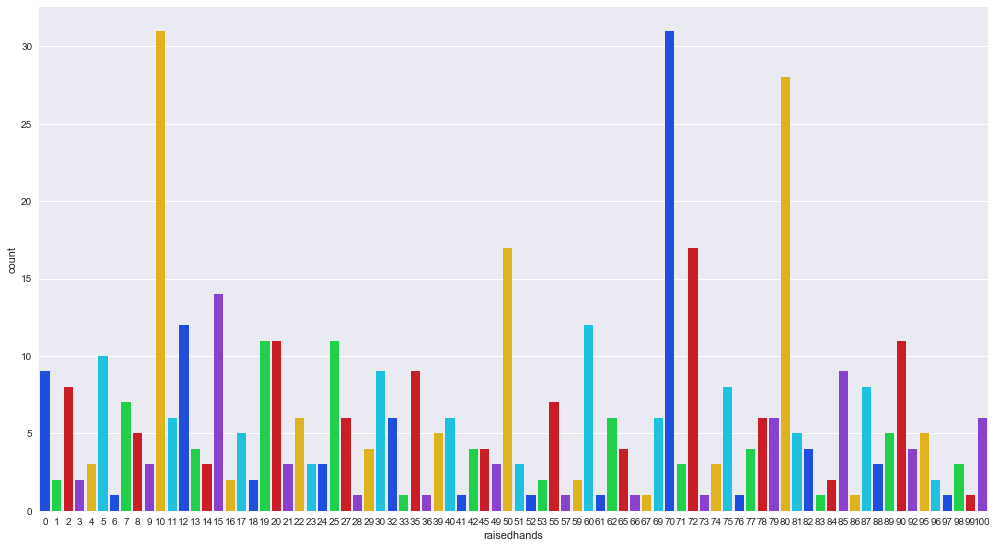

In [12]:
sns.set(rc={'figure.figsize':(17,9.27)}) #Bigger Size
sns.countplot(x="raisedhands", data=df, palette="bright") #Always based on count
plt.show()

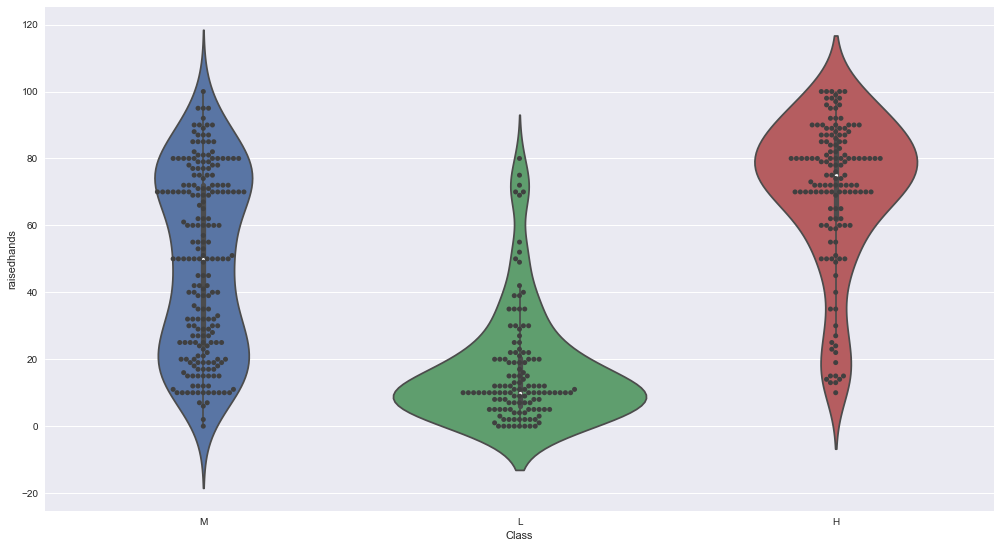

In [13]:
Raised_hand = sns.violinplot(x="Class", y="raisedhands", data=df)
Raised_hand = sns.swarmplot(x="Class", y="raisedhands", data=df , color=".25")

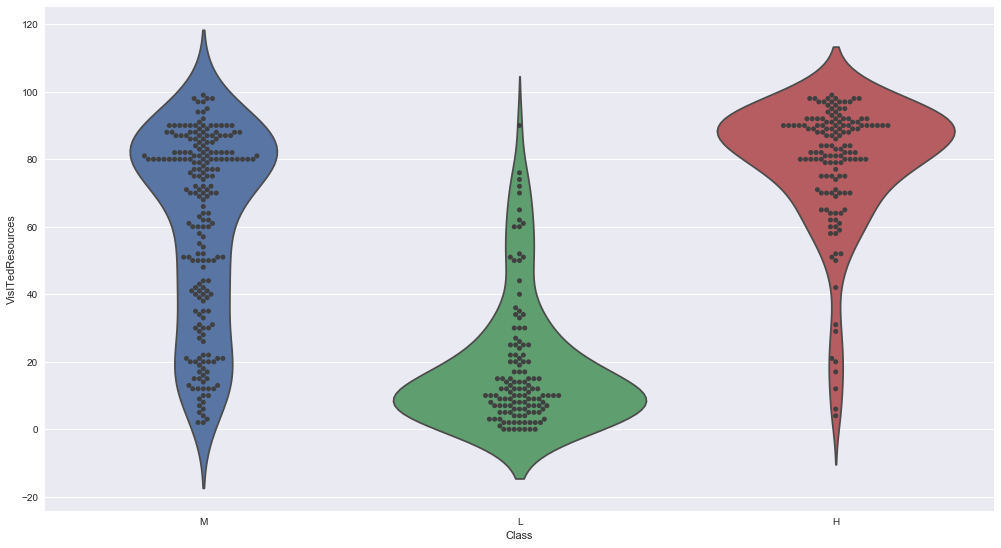

In [14]:
Vis_res = sns.violinplot(x="Class", y="VisITedResources", data=df, inner=None)
Vis_res = sns.swarmplot(x="Class", y="VisITedResources", data=df, color=".25")

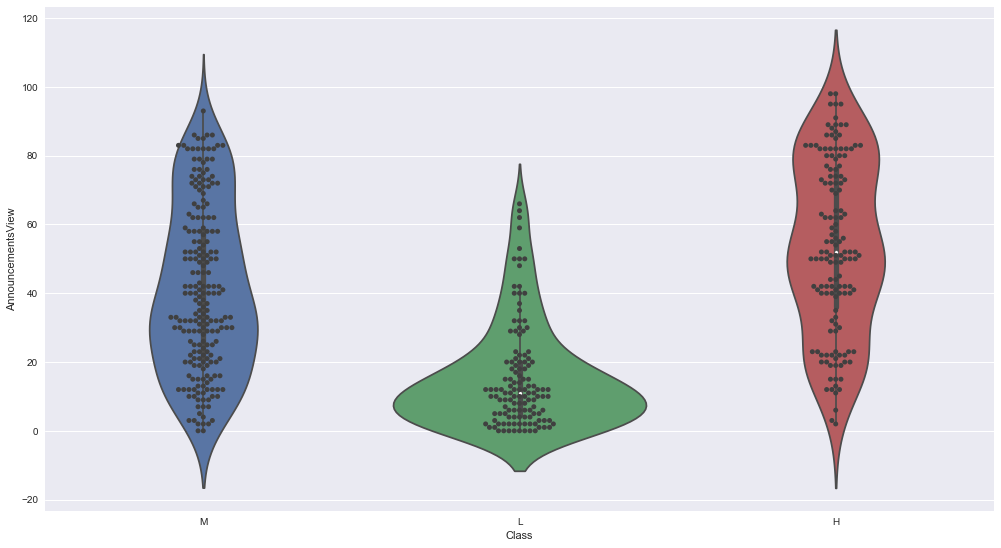

In [15]:
ax = sns.violinplot(x="Class", y="AnnouncementsView", data=df)
ax = sns.swarmplot(x="Class", y="AnnouncementsView", data=df, color=".25")

# Result?
Swarmplot indicates clearly that the lowest performers rarely visited the course resourses!
It also showes that less people in high-level grade class viewed course announcements.

In [16]:
df[9:13].describe() #from 9 to 13 not 13 #.describe => 

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,4.000000,4.000000,4.000000,4.000000
mean,36.000000,43.750000,18.500000,43.250000
std,29.450523,46.636002,13.127579,36.890604
min,5.000000,1.000000,0.000000,11.000000
25%,15.500000,4.750000,14.250000,11.750000
50%,34.500000,43.000000,22.000000,41.000000
75%,55.000000,82.000000,26.250000,72.500000
max,70.000000,88.000000,30.000000,80.000000


# Very Important step !
First, the perceptron and SVC will be trained on the continuous data. by giving them layers :-)

In [17]:
#to label class from L-M-H to 0, 1, 2
df['Class'].loc[df.Class == 'L'] = 0.0
df['Class'].loc[df.Class == 'M'] = 1.0
df['Class'].loc[df.Class == 'H'] = 2.0

#to label Gender from Male and Female to 0 and 1
df['gender'].loc[df.gender == 'M'] = 0.0
df['gender'].loc[df.gender == 'F'] = 1.0

df['NationalITy'].loc[df.NationalITy == 'KW'] = 0
df['NationalITy'].loc[df.NationalITy == 'lebanon'] = 1
df['NationalITy'].loc[df.NationalITy == 'Egypt'] = 2
df['NationalITy'].loc[df.NationalITy == 'SaudiArabia'] = 3
df['NationalITy'].loc[df.NationalITy == 'USA'] = 4
df['NationalITy'].loc[df.NationalITy == 'Jordan'] = 5
df['NationalITy'].loc[df.NationalITy == 'venzuela'] = 6
df['NationalITy'].loc[df.NationalITy == 'Iran'] = 7
df['NationalITy'].loc[df.NationalITy == 'Tunis'] = 8
df['NationalITy'].loc[df.NationalITy == 'Morocco'] = 9
df['NationalITy'].loc[df.NationalITy == 'Syria'] = 10
df['NationalITy'].loc[df.NationalITy == 'Palestine'] = 11
df['NationalITy'].loc[df.NationalITy == 'Iraq'] = 12
df['NationalITy'].loc[df.NationalITy == 'Lybia'] = 13

df['PlaceofBirth'].loc[df.PlaceofBirth == 'KuwaIT'] = 0
df['PlaceofBirth'].loc[df.PlaceofBirth == 'lebanon'] = 1
df['PlaceofBirth'].loc[df.PlaceofBirth == 'Egypt'] = 2
df['PlaceofBirth'].loc[df.PlaceofBirth == 'SaudiArabia'] = 3
df['PlaceofBirth'].loc[df.PlaceofBirth == 'USA'] = 4
df['PlaceofBirth'].loc[df.PlaceofBirth == 'Jordan'] = 5
df['PlaceofBirth'].loc[df.PlaceofBirth == 'venzuela'] = 6
df['PlaceofBirth'].loc[df.PlaceofBirth == 'Iran'] = 7
df['PlaceofBirth'].loc[df.PlaceofBirth == 'Tunis'] = 8
df['PlaceofBirth'].loc[df.PlaceofBirth == 'Morocco'] = 9
df['PlaceofBirth'].loc[df.PlaceofBirth == 'Syria'] = 10
df['PlaceofBirth'].loc[df.PlaceofBirth == 'Iraq'] = 11
df['PlaceofBirth'].loc[df.PlaceofBirth == 'Palestine'] = 12
df['PlaceofBirth'].loc[df.PlaceofBirth == 'Lybia'] = 13

df['StageID'].loc[df.StageID == 'lowerlevel'] = 0
df['StageID'].loc[df.StageID == 'MiddleSchool'] = 1
df['StageID'].loc[df.StageID == 'HighSchool'] = 2

df['GradeID'].loc[df.GradeID == 'G-04'] = 0
df['GradeID'].loc[df.GradeID == 'G-07'] = 1
df['GradeID'].loc[df.GradeID == 'G-08'] = 2
df['GradeID'].loc[df.GradeID == 'G-06'] = 3
df['GradeID'].loc[df.GradeID == 'G-05'] = 4
df['GradeID'].loc[df.GradeID == 'G-09'] = 5
df['GradeID'].loc[df.GradeID == 'G-12'] = 6
df['GradeID'].loc[df.GradeID == 'G-11'] = 7
df['GradeID'].loc[df.GradeID == 'G-10'] = 8
df['GradeID'].loc[df.GradeID == 'G-02'] = 9

df['SectionID'].loc[df.SectionID == 'A'] = 0
df['SectionID'].loc[df.SectionID == 'B'] = 1
df['SectionID'].loc[df.SectionID == 'C'] = 2

df['Topic'].loc[df.Topic == 'IT'] = 0
df['Topic'].loc[df.Topic == 'Math'] = 1
df['Topic'].loc[df.Topic == 'Arabic'] = 2
df['Topic'].loc[df.Topic == 'Science'] = 3
df['Topic'].loc[df.Topic == 'English'] = 4
df['Topic'].loc[df.Topic == 'Quran'] = 5
df['Topic'].loc[df.Topic == 'Spanish'] = 6
df['Topic'].loc[df.Topic == 'French'] = 7
df['Topic'].loc[df.Topic == 'History'] = 8
df['Topic'].loc[df.Topic == 'Biology'] = 9
df['Topic'].loc[df.Topic == 'Chemistry'] = 10
df['Topic'].loc[df.Topic == 'Geology'] = 11

df['Semester'].loc[df.Semester == 'F'] = 0
df['Semester'].loc[df.Semester == 'S'] = 1

df['Relation'].loc[df.Relation == 'Father'] = 0
df['Relation'].loc[df.Relation == 'Mum'] = 1

df['ParentAnsweringSurvey'].loc[df.ParentAnsweringSurvey == 'Yes'] = 0
df['ParentAnsweringSurvey'].loc[df.ParentAnsweringSurvey == 'No'] = 1

df['ParentschoolSatisfaction'].loc[df.ParentschoolSatisfaction == 'Good'] = 0
df['ParentschoolSatisfaction'].loc[df.ParentschoolSatisfaction == 'Bad'] = 1

df['StudentAbsenceDays'].loc[df.StudentAbsenceDays == 'Under-7'] = 0
df['StudentAbsenceDays'].loc[df.StudentAbsenceDays == 'Above-7'] = 1


C:\Users\mk26665\AppData\Local\conda\conda\envs\Machine-Learning\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
# comment to see if the previous labeling works or not
'''print(df['StageID'].unique())
print(df['GradeID'].unique())
print(df['SectionID'].unique())
print(df['Topic'].unique())
print(df['Semester'].unique())
print(df['Relation'].unique())
print(df['ParentAnsweringSurvey'].unique())
print(df['ParentschoolSatisfaction'].unique())
print(df['StudentAbsenceDays'].unique())'''

"print(df['StageID'].unique())\nprint(df['GradeID'].unique())\nprint(df['SectionID'].unique())\nprint(df['Topic'].unique())\nprint(df['Semester'].unique())\nprint(df['Relation'].unique())\nprint(df['ParentAnsweringSurvey'].unique())\nprint(df['ParentschoolSatisfaction'].unique())\nprint(df['StudentAbsenceDays'].unique())"

In [19]:
continuous_subset = df.ix[:,0:16]

C:\Users\mk26665\AppData\Local\conda\conda\envs\Machine-Learning\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


This is amazing that all those values in the data like the names and ... are number right now :-) this is just cool

In [20]:
X = np.array(continuous_subset).astype('float64')   #Inputs and features
y = np.array(df['Class']).astype('float64')         #Targets
X.shape

(480, 16)

## Machine Learning Part ?

In [21]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\mk26665\AppData\Local\conda\conda\envs\Machine-Learning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler() #It will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

sc.fit(X_train) # Compute the mean and std to be used for later scaling
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) # Fit to data, then transform it.

In [23]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 55


C:\Users\mk26665\AppData\Local\conda\conda\envs\Machine-Learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [24]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.62
